In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("jobs_in_data.csv")
df.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


In [4]:
df.isna().sum()

work_year             0
job_title             0
job_category          0
salary_currency       0
salary                0
salary_in_usd         0
employee_residence    0
experience_level      0
employment_type       0
work_setting          0
company_location      0
company_size          0
dtype: int64

In [5]:
df.sample(5)

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
5379,2023,Machine Learning Engineer,Machine Learning and AI,USD,221000,221000,United States,Senior,Full-time,In-person,United States,M
302,2023,Machine Learning Engineer,Machine Learning and AI,USD,170000,170000,United States,Senior,Full-time,Remote,United States,M
3171,2023,Data Strategist,Data Architecture and Modeling,USD,125000,125000,United States,Senior,Full-time,Remote,United States,M
6470,2021,Data Science Lead,Data Science and Research,USD,150000,150000,United States,Mid-level,Full-time,Remote,United States,M
8485,2022,Data Engineer,Data Engineering,USD,100000,100000,United States,Mid-level,Full-time,In-person,United States,M


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
columns = df.columns
columns

Index(['work_year', 'job_title', 'job_category', 'salary_currency', 'salary',
       'salary_in_usd', 'employee_residence', 'experience_level',
       'employment_type', 'work_setting', 'company_location', 'company_size'],
      dtype='object')

In [8]:
for c in columns:
    print(c)

work_year
job_title
job_category
salary_currency
salary
salary_in_usd
employee_residence
experience_level
employment_type
work_setting
company_location
company_size


In [9]:
label_encoder = LabelEncoder()

In [11]:

df["job_title"]=label_encoder.fit_transform(df["job_title"])
df["job_category"]=label_encoder.fit_transform(df["job_category"])
df["employee_residence"]=label_encoder.fit_transform(df["employee_residence"])
df["experience_level"]=label_encoder.fit_transform(df["experience_level"])
df["employment_type"]=label_encoder.fit_transform(df["employment_type"])
df["work_setting"]=label_encoder.fit_transform(df["work_setting"])
df["company_location"]=label_encoder.fit_transform(df["company_location"])
df["company_size"]=label_encoder.fit_transform(df["company_size"])
df

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,42,4,EUR,88000,95012,29,2,2,0,23,0
1,2023,41,3,USD,186000,186000,80,3,2,1,69,1
2,2023,41,3,USD,81800,81800,80,3,2,1,69,1
3,2023,69,7,USD,212000,212000,80,3,2,1,69,1
4,2023,69,7,USD,93300,93300,80,3,2,1,69,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9350,2021,71,5,USD,165000,165000,80,3,2,2,69,0
9351,2020,69,7,USD,412000,412000,80,3,2,2,69,0
9352,2021,114,7,USD,151000,151000,80,2,2,2,69,0
9353,2020,69,7,USD,105000,105000,80,0,2,2,69,2


In [18]:
y = df["salary_in_usd"]
X = df.drop(["salary_currency","salary","salary_in_usd"], axis=1)

In [19]:
X

,work_year,job_title,job_category,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,42,4,29,2,2,0,23,0
1,2023,41,3,80,3,2,1,69,1
2,2023,41,3,80,3,2,1,69,1
3,2023,69,7,80,3,2,1,69,1
4,2023,69,7,80,3,2,1,69,1
...,...,...,...,...,...,...,...,...,...
9350,2021,71,5,80,3,2,2,69,0
9351,2020,69,7,80,3,2,2,69,0
9352,2021,114,7,80,2,2,2,69,0
9353,2020,69,7,80,0,2,2,69,2


In [20]:
y

0        95012
1       186000
2        81800
3       212000
4        93300
         ...  
9350    165000
9351    412000
9352    151000
9353    105000
9354    100000
Name: salary_in_usd, Length: 9355, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=42, test_size=0.2)

In [25]:
X_train

,work_year,job_title,job_category,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
4071,2023,96,9,5,2,2,1,5,1
3025,2023,25,0,80,3,2,1,69,1
3127,2023,69,7,80,2,2,1,69,1
3019,2023,69,7,80,3,2,1,69,1
5288,2023,96,9,80,3,2,1,69,1
...,...,...,...,...,...,...,...,...,...
5734,2023,72,3,12,3,2,1,11,1
5191,2023,35,2,80,3,2,2,69,1
5390,2023,44,4,80,3,2,1,69,1
860,2023,12,7,80,3,2,1,69,0


In [27]:
from sklearn.neighbors import KNeighborsRegressor

In [28]:
KNR = KNeighborsRegressor()

In [29]:
KNR.fit(X_train, y_train)

KNeighborsRegressor()

In [30]:
pred = KNR.predict(X_test)

In [31]:
pred

array([154885. ,  68651.2, 157860. , ..., 129868. , 165890.8, 163180. ])

In [32]:
import matplotlib.pyplot as plt

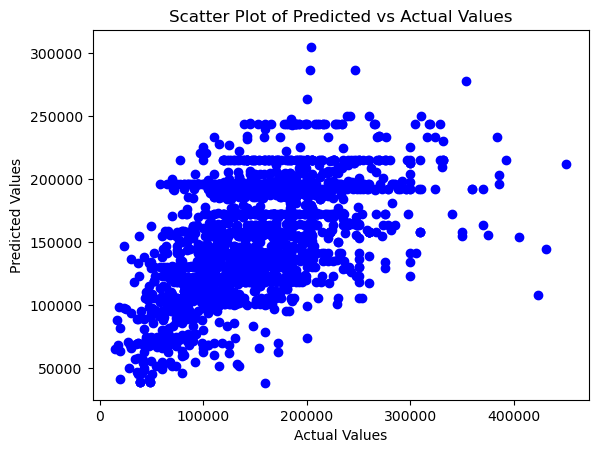

In [34]:
plt.scatter(y_test, pred, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

In [41]:
from sklearn.metrics import mean_absolute_error

In [42]:
accuracy = mean_absolute_error(y_test, pred)

print("Accuracy:", accuracy)

Accuracy: 42146.610154997325


In [38]:
y_test

8259    153600
2970     86000
5272    222200
5405     69525
6908    180000
         ...  
4537    175000
6633    156400
2133    110000
6713    107968
794     225000
Name: salary_in_usd, Length: 1871, dtype: int64

In [39]:
pred

array([154885. ,  68651.2, 157860. , ..., 129868. , 165890.8, 163180. ])